In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/online_retail.xlsx") 
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## How many customers are there in the dataset?

In [ ]:
df['Customer ID'].value_counts()

14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
           ... 
18174.0       1
14827.0       1
17645.0       1
16443.0       1
13222.0       1
Name: Customer ID, Length: 4383, dtype: int64

## Describe the dataset with the necessary information?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


## Is there any abnormal type for each feature?

In [ ]:
df = df[~df['Customer ID'].isna()]
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df = df[(df['Quantity']>0) & (df['Price']>0)] #>0 thì mới hợp logic trong kinh doanh
df.shape

(407664, 8)

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,15368.592598
std,96.840747,34.757965,1679.762138
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      407664 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


## How many unique values are there in each feature?

In [ ]:
df.nunique()

Invoice        19213
StockCode       4017
Description     4444
Quantity         343
InvoiceDate    18008
Price            448
Customer ID     4312
Country           37
dtype: int64

## How many missing values are there in each feature?

In [ ]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

## Are there any outliers in each feature?

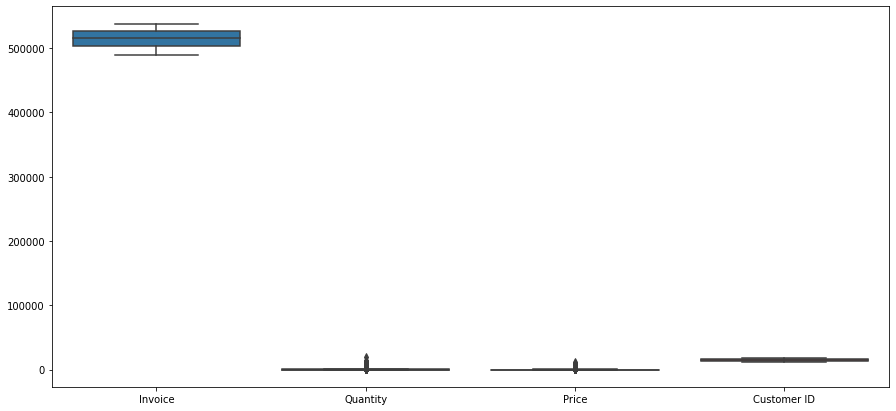

In [ ]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df)
plt.show()

In [ ]:
df['Price']

0         6.95
1         6.75
2         6.75
3         2.10
4         1.25
          ... 
525456    2.95
525457    3.75
525458    3.75
525459    3.75
525460    1.95
Name: Price, Length: 407664, dtype: float64

In [ ]:
#Find Q1, 3
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
#Calculate IQR
IQR = q3 - q1
#Define max min limit
max_limit = q3 + 1.5*IQR
min_limit = q1 - 1.5*IQR

In [ ]:
df_skew_new = pd.DataFrame(np.where(df['Price'] > max_limit, max_limit,
                          (np.where(df['Price'] < min_limit, min_limit, df['Price']))),
                          columns = ['Price'])

In [ ]:
df_skew_new.head(10)

,Price
0,6.95
1,6.75
2,6.75
3,2.10
4,1.25
5,1.65
6,1.25
7,5.95
8,2.55
9,3.75


In [ ]:
#Show ra phân bố trước khi capping
#plt.figure(figsize = (10,5))
#plt.suptitle("Distribution before capping")
#plt.subplot(1,2,1)
#sns.histplot(data = df, x='Price')

#plt.subplot(1,2,2)
#sns.boxplot(data = df, x='Price', palette='magma')
#plt.show()

In [ ]:
#plt.figure(figsize = (10,5))
#plt.suptitle("Distribution after capping")
#plt.subplot(1,2,1)
#sns.histplot(data = df_skew_new, x='Price')

#plt.subplot(1,2,2)
#sns.boxplot(data = df_skew_new, x='Price', palette='magma')
#plt.show()

In [ ]:
len(df['Price']), len(df_skew_new)

(407664, 407664)

## Remove the missing values if any

## Convert the Customer ID to numeric

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      407664 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [ ]:
df['Customer ID'] = df['Customer ID'].astype('int64')

## Remove the duplicates and test data where StockCode is 'TEST' or 'M'

In [ ]:
remove = df[df['StockCode'].astype(str).str.contains('M|TEST')]
remove

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1857,489594,79302M,"ART LIGHTS,FUNK MONKEY",1,2009-12-01 14:19:00,2.95,15005,United Kingdom
2845,489617,46000M,POLYESTER FILLER PAD 45x45cm,4,2009-12-01 14:59:00,1.55,13442,United Kingdom
4366,489810,46000M,POLYESTER FILLER PAD 45x45cm,4,2009-12-02 12:47:00,1.55,18108,United Kingdom
6216,489875,46000M,POLYESTER FILLER PAD 45x45cm,4,2009-12-02 15:41:00,1.55,17841,United Kingdom
6752,489916,16169M,WRAP DAISY CARPET,25,2009-12-03 10:37:00,0.42,15194,United Kingdom
...,...,...,...,...,...,...,...,...
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748,United Kingdom
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748,United Kingdom
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748,United Kingdom
522185,537850,16168M,FUNKY MONKEY GIFT BAG MEDIUM,24,2010-12-08 15:38:00,0.42,16722,United Kingdom


In [ ]:
print("Number of duplicated transactions:", len(remove.duplicated()))

Number of duplicated transactions: 873


In [ ]:
df.drop_duplicates(inplace = True) #407664 - 873 = 400916

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400916 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  int64         
 7   Country      400916 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.5+ MB


# Create new features from the existing features to capture the RFM (Recency, Frequency, Monetary) of the customer.

## Create StockValue feature, which is the product of Quantity and Price.

In [ ]:
df['StockValue'] = df['Quantity']*df['Price']
df['StockValue']

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
525456      5.90
525457      3.75
525458      3.75
525459      7.50
525460      3.90
Name: StockValue, Length: 400916, dtype: float64

## Create Recency feature, which is the difference between InvoiceDate and InvoiceDate of the last invoice.

In [ ]:
print(df['InvoiceDate'].min()) #First InvoiceDate

2009-12-01 07:45:00


In [ ]:
print(df['InvoiceDate'].max()) #Last InvoiceDate

2010-12-09 20:01:00


In [ ]:
# Chuyển về kiểu date

In [ ]:
import datetime as dt
now = dt.datetime(2010,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
525456   2010-12-09 20:01:00
525457   2010-12-09 20:01:00
525458   2010-12-09 20:01:00
525459   2010-12-09 20:01:00
525460   2010-12-09 20:01:00
Name: InvoiceDate, Length: 400916, dtype: datetime64[ns]

In [ ]:
# Find the most recent orderDate.
Recency = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (now - x.max()).days}) #Thời điểm hiện tại - ngày gần nhất mà khách hàng vào cửa hàng để mua (lần cuối khách hàng vào mua)
Recency['InvoiceDate'] = Recency['InvoiceDate'].astype(int) #Ví dụ hiện tại là ngày 15/7/2022, lần cuối mình vô app Shopee mua hàng là cách đây 2 tháng thì Recency = 15/7/2022 - 15/5/2022
Recency.rename(columns={'InvoiceDate': 'Recency'}, inplace=True) #Suy ra Recency càng nhỏ thì khách hàng vô ra app mình mua càng nhiều => Tín hiệu tốt

In [ ]:
pd.DataFrame(Recency) #Chuyển sang columns = df['Recency']

,Recency
Customer ID,
12346,164
12347,2
12348,73
12349,42
12351,10
...,...
18283,17
18284,66
18285,295


In [ ]:
df = pd.merge(df, pd.DataFrame(Recency).reset_index(), on = ['Customer ID'])

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,StockValue,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,314
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,314
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,314
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,314
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,314
...,...,...,...,...,...,...,...,...,...,...
400911,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211,United Kingdom,35.40,0
400912,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211,United Kingdom,15.30,0
400913,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211,United Kingdom,17.70,0
400914,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211,United Kingdom,19.80,0


In [ ]:
df['Recency'].max() #Lần cuối khách hàng mua sản phẩm là cách đây 373 ngày

373

In [ ]:
df['Recency'].unique()

array([314,   1,  83,   0,  14,  77,  70, 373,   3, 326, 261,  49,  10,
         4,   6,  62,  16,  28,  15, 262,  27, 128,  21,   2,  55,  11,
        42,  13,  63, 244,  17,  56,  23,  35, 296,  72,  24,  94,   7,
       165, 302, 304,   8, 239, 181, 142, 366,  58,  39,  65, 315,  22,
       146, 372,  78,  52,  69, 196, 148, 147, 143,  30,  50, 365, 323,
       231, 268,  57,  45,  31,  41, 241,  48, 371,  25,  84, 114,   9,
       256, 233, 226, 284, 162, 105, 111,  80, 150,  60, 357,  76,  37,
        29,  98, 230, 140,  34, 156,  18,  67,  20, 370, 186, 217,  46,
       214, 115, 245,  59, 106,  44, 182, 297, 183,  66, 275,  32, 369,
       157, 175,  64,  71,  53, 368,  88,  95, 137, 119, 263, 303, 367,
       154, 113, 179,  43, 307, 122, 104, 218, 127,  73, 289,  97, 359,
       258,  38,  85,  36, 198, 170, 189, 212, 213, 135, 144,  81, 361,
        92, 269, 126, 276, 246, 247, 204, 102, 274, 129, 252, 364,  51,
       253,  87, 318, 176, 363, 107, 149, 211, 123, 319, 358, 16

In [ ]:
df['Recency'].value_counts()

0      36184
1      21304
3      16949
4      15009
7      12973
       ...  
369        5
242        4
332        3
322        2
153        1
Name: Recency, Length: 301, dtype: int64

In [ ]:
#df.drop('Monetary_y', axis=1, inplace=True)

## Create Frequency feature, which is the number of invoices of the customer.

In [ ]:
Frequency = df.groupby('Customer ID').agg({'Invoice': lambda x: len(x)}) #Ở cột Invoice truyền hàm lambda biến x = len(x)
Frequency['Invoice'] = Frequency['Invoice'].astype(int)
Frequency.rename(columns={'Invoice': 'Frequency'}, inplace=True)

In [ ]:
pd.DataFrame(Frequency)

,Frequency
Customer ID,
12346,33
12347,71
12348,20
12349,102
12351,21
...,...
18283,217
18284,28
18285,12


In [ ]:
df = pd.merge(df, pd.DataFrame(Frequency).reset_index(), on = ['Customer ID']) #df merge với Frequency vừa tạo thông qua cột Customer ID

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,StockValue,Recency,Frequency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,314,62
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,314,62
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,314,62
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,314,62
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,314,62
...,...,...,...,...,...,...,...,...,...,...,...
400911,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211,United Kingdom,35.40,0,23
400912,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211,United Kingdom,15.30,0,23
400913,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211,United Kingdom,17.70,0,23
400914,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211,United Kingdom,19.80,0,23


In [ ]:
df['Frequency'].max() #Tần suất mua nhiều nhất là 5568 lần

5568

In [ ]:
df['Frequency'].unique()

array([  62,  443,   40,  627,  514,   86,  100,  244,    1,  140,  192,
         25,   11,   63,  640,   13,  427,  644,  113, 2038,  104,  218,
       5568,  921,  136,   72,  194,  101,  254,  237,  430,  552,   46,
        584,  137,   91, 2646,  163,  127,  839,  217,   18,    8,   44,
         27,   58,   70,   68,  400,  545,  147,  583,  319,  447,   65,
        814,  141,   28,   14,   12,   17,  107, 1303,   85,  216,  410,
        462,   39,   38,  184,   21,  697,    5,  126,  632,  333,   31,
        111,  356,  401,   74,    6,   19,  106,  131,  122,   82,   34,
        135,   67,   10,   23,  221,  948,  197,   87,   32,  311,   42,
         60,  183,  148,  464,  226, 1159,   24, 1725,   16,  188,  559,
         71,   84,    9,  775, 1343,  214,   30,  158,   98,  196,   53,
        181,  398,  264,  170,  179,  206,   76,  210,  133,   51,  130,
         79,  441,   15,  202,  478,   75, 4944, 1542,  109,  364,  162,
       1773,  128,  154,   47,  339,    4,   78,   

In [ ]:
df['Frequency'].value_counts()

5568    5568
4944    4944
3802    3802
2646    2646
2531    2531
        ... 
198      198
175      175
3        120
2        110
1         91
Name: Frequency, Length: 464, dtype: int64

## Create Monetary feature, which is the sum of StockValue of the invoices. Make sure that the features are in the same scale in the dataset with no missing values or outliers.

In [ ]:
Monetary = df.groupby('Customer ID').agg({'StockValue': lambda x: sum(x)})
Monetary['StockValue'] = Monetary['StockValue'].astype(float)
Monetary.rename(columns={'StockValue': 'Monetary'}, inplace=True)

In [ ]:
pd.DataFrame(Monetary)

,Monetary
Customer ID,
12346,372.86
12347,1323.32
12348,222.16
12349,2671.14
12351,300.93
...,...
18283,619.37
18284,461.68
18285,427.00


In [ ]:
df = pd.merge(df, pd.DataFrame(Monetary).reset_index(), on = ['Customer ID'])

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,StockValue,Recency,Frequency,Monetary
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,314,62,2017.20
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,314,62,2017.20
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,314,62,2017.20
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,314,62,2017.20
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,314,62,2017.20
...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211,United Kingdom,35.40,0,23,383.07
400912,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211,United Kingdom,15.30,0,23,383.07
400913,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211,United Kingdom,17.70,0,23,383.07
400914,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211,United Kingdom,19.80,0,23,383.07


In [ ]:
df['Monetary'].unique()

array([ 2017.2 , 16904.51,   613.08, ...,   258.75,   308.28,   383.07])

In [ ]:
df['Monetary'].value_counts()

152121.22    5568
29562.02     4944
18482.10     3802
196549.74    2646
22457.90     2531
             ... 
88.50           1
48.96           1
72.00           1
34.00           1
68.44           1
Name: Monetary, Length: 4281, dtype: int64

In [ ]:
df_merge = Recency.merge(Frequency, on='Customer ID')
df_merge.head()

,Recency,Frequency
Customer ID,,
12346,164,33
12347,2,71
12348,73,20
12349,42,102
12351,10,21


In [ ]:
#Merge with monetary dataframe
rfm = df_merge.merge(Monetary,on='Customer ID')
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,164,33,372.86
12347,2,71,1323.32
12348,73,20,222.16
12349,42,102,2671.14
12351,10,21,300.93


## Score each quantitle of those columns

- R score for Recency: the score will be [4, 3, 2, 1] as customers who buy goods recently will have higher score
- F score for Frequency: the score will be [1, 2, 3, 4] as customers who buy goods more times will have higer score
- M score for Monetary: the score will be [1, 2, 3, 4] as customers who spend more money will have higher score

**- Khách hàng mua gần nhất: 4 có tần suất mua hàng nhiều nhất: 4 và chi tiền nhiều nhất: 4 => RFM category 444: khách hàng vip**

In [ ]:
rfm['R'] = pd.cut(rfm['Recency'], bins=4, labels=[4,3,2,1]) #Số ngày mua hàng gần nhất
rfm['F'] = pd.cut(rfm['Frequency'], bins=4, labels=[1,2,3,4]) #Tần suất mua hàng
rfm['M'] = pd.cut(rfm['Monetary'], bins=4, labels=[1,2,3,4]) #Doanh số
rfm.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346,164,33,372.86,3,1,1
12347,2,71,1323.32,4,1,1
12348,73,20,222.16,4,1,1
12349,42,102,2671.14,4,1,1
12351,10,21,300.93,4,1,1


## Calculate RFM category and score

- RFM category is the combine of those scores for R, F and M. Eg. R=2, F=3, M=1 then RFM category is 231.
- RFM score is the sum of scores for R, F and M. R=2, F=3, M=1 then RFM score is 6.

In [ ]:
rfm['R'].astype(int)
rfm['F'].astype(int)
rfm['M'].astype(int)

Customer ID
12346    1
12347    1
12348    1
12349    1
12351    1
        ..
18283    1
18284    1
18285    1
18286    1
18287    1
Name: M, Length: 4312, dtype: int64

In [ ]:
#Chạy câu này 
rfm['RFM_category'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis=1)
rfm['RFM_score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score
Customer ID,,,,,,,,
12346,164,33,372.86,3,1,1,311,5
12347,2,71,1323.32,4,1,1,411,6
12348,73,20,222.16,4,1,1,411,6
12349,42,102,2671.14,4,1,1,411,6
12351,10,21,300.93,4,1,1,411,6


In [ ]:
#Chạy câu này rồi quay ngược lại câu trên chạy 1 lần nữa là ra kiểu int
rfm['RFM_category'].astype(str).astype(int)

ValueError: ignored

In [ ]:
rfm['RFM_category'].dtypes #Đang là kiểu object

dtype('O')

In [ ]:
rfm['RFM_score'].unique()

array([ 5,  6,  4,  3,  7,  9,  8, 10])

In [ ]:
rfm[rfm['RFM_score']==10] #Khách hàng có điểm cao nhất là khách hàng vip nhất

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score
Customer ID,,,,,,,,
14911,0,5568,152121.22,4,4,2,442,10


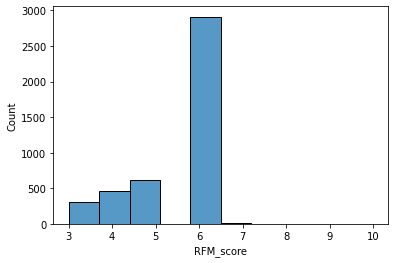

In [ ]:
sns.histplot(data=rfm, x='RFM_score', bins=10)

# 6. Clustering with suitable algorithm
Perform clustering on the dataset using the algorithm that is suitable for the problem. E.g Kmeans, GMM, DBSCAN, etc. In terms of K-means, make sure to find the optimal number of clusters using the elbow method. Visualize the clusters using the above analysis. Examine the clusters formed via scatter plot.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def category(RFM_score):
    if RFM_score == 3 or RFM_score == 4 or RFM_score == 5:
        return 0
    if RFM_score == 6 or RFM_score == 7:
        return 1
    if RFM_score == 8 or RFM_score == 9 or RFM_score == 10:
        return 2
    return 'unknown'

rfm['category'] = rfm['RFM_score'].apply(category) #Phân loại xong sau đó nối hàm phân loại vào cột RFM_score để tạo category
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category
Customer ID,,,,,,,,,
12346,164,33,372.86,3,1,1,311,5,0
12347,2,71,1323.32,4,1,1,411,6,1
12348,73,20,222.16,4,1,1,411,6,1
12349,42,102,2671.14,4,1,1,411,6,1
12351,10,21,300.93,4,1,1,411,6,1


In [ ]:
rfm['category'].dtypes

dtype('int64')

In [ ]:
rfm['category'].value_counts()

1    2918
0    1388
2       6
Name: category, dtype: int64

In [ ]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category
Customer ID,,,,,,,,,
12346,164,33,372.86,3,1,1,311,5,0
12347,2,71,1323.32,4,1,1,411,6,1
12348,73,20,222.16,4,1,1,411,6,1
12349,42,102,2671.14,4,1,1,411,6,1
12351,10,21,300.93,4,1,1,411,6,1
...,...,...,...,...,...,...,...,...,...
18283,17,217,619.37,4,1,1,411,6,1
18284,66,28,461.68,4,1,1,411,6,1
18285,295,12,427.00,1,1,1,111,3,0


## Tạo ra cột R-rank, R-rank-norm

In [ ]:
'''rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100
 
rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm.head()'''

"rfm['R_rank'] = rfm['Recency'].rank(ascending=False)\nrfm['F_rank'] = rfm['Frequency'].rank(ascending=True)\nrfm['M_rank'] = rfm['Monetary'].rank(ascending=True)\n \n# normalizing the rank of the customers\nrfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100\nrfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100\nrfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100\n \nrfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)\n \nrfm.head()"

- RFM score = (Recency score x Recency weight) + (Frequency score x Frequency weight) + (Monetary score x Monetary weight)

In [ ]:
'''recency_weight = 0.15
frequency_weight = 0.28
monetary_weight = 0.57
rfm['RFM_Score'] = recency_weight*rfm['R_rank_norm'] +frequency_weight*rfm['F_rank_norm'] +monetary_weight*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
rfm.head()'''

"recency_weight = 0.15\nfrequency_weight = 0.28\nmonetary_weight = 0.57\nrfm['RFM_Score'] = recency_weight*rfm['R_rank_norm'] +frequency_weight*rfm['F_rank_norm'] +monetary_weight*rfm['M_rank_norm']\nrfm['RFM_Score'] *= 0.05\nrfm = rfm.round(2)\nrfm.head()"

In [ ]:
from sklearn.cluster import KMeans

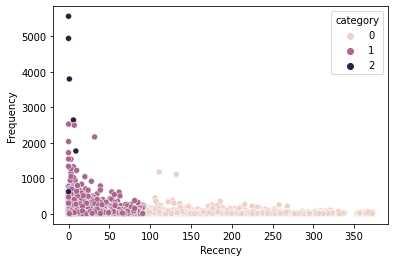

In [ ]:
#plot thử: Monetary cần phải phân nhóm để hợp với các cột còn lại có kiểu dữ liệu Binary, nếu không sẽ trả ra error không plot được
sns.scatterplot(data=rfm,
               x = 'Recency',
               y = 'Frequency',
               hue = 'category');

- Nhận xét: 
  - Tần suất mua hàng càng cao 5568 (càng nhiều, nhóm khách hàng hướng lên trên xa số 0 thì càng tốt vì tần suất họ mua nhiều).
  - Recency là ngày gần nhất khách hàng mua hàng ở cửa hàng mình => những nhóm khách hàng mà tiến ra càng xa số 0 thì là những khách hàng không tiềm năng vì họ đã rời app mình lâu rồi (con số 373).


# Mình làm búa xua nãy giờ là để làm chi?

- Mục tiêu: Dựa trên Tần suất mua hàng và ngày gần nhất khách hàng vào app mua, ta tiên đoán khách hàng đó thuộc nhóm tiềm năng hay không tiềm năng.
- Lưu ý vì đây là Unsupervised learning nên chúng ta chỉ đưa X vào mô hình.

#Khi đã biết số nhóm cần phân chia, dùng n_clusters

In [ ]:
X = rfm[['Recency','Frequency']]  
#y = rfm['category']
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X) #fit giá trị X thôi vì là Unsupervised Learning 
y_pred = kmeans.fit_predict(X)

### Segment customers based on RFM score
- 0 - 50 - Low valued customer
- 50 - 75 - Medium valued customer
- 76 - 100 - High valued customer

In [ ]:
pd.DataFrame(rfm['category'])

,category
Customer ID,
12346,0
12347,1
12348,1
12349,1
12351,1
...,...
18283,1
18284,1
18285,0


In [ ]:
#value_map = {0:'Low Customers', 1:'Medium Value Customer', 2:'High value customer'}
#y_pred = np.array([value_map[i] for i in y_pred]) 
#y_pred

In [ ]:
rfm['category'].value_counts() #Phân nhóm thủ công

1    2918
0    1388
2       6
Name: category, dtype: int64

In [ ]:
y_pred

array([2, 1, 1, ..., 0, 2, 1], dtype=int32)

## Máy dự đoán 2 tiêu chí trên thì khách hàng được xếp nhóm nào?


In [ ]:
rfm['cluster'] = y_pred
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category,cluster
Customer ID,,,,,,,,,,
12346,0.439678,0.005748,372.86,3,1,1,311,5,0,2
12347,0.005362,0.012574,1323.32,4,1,1,411,6,1,1
12348,0.195710,0.003413,222.16,4,1,1,411,6,1,1
12349,0.112601,0.018143,2671.14,4,1,1,411,6,1,1
12351,0.026810,0.003593,300.93,4,1,1,411,6,1,1


In [ ]:
#!pip install --upgrade pandas

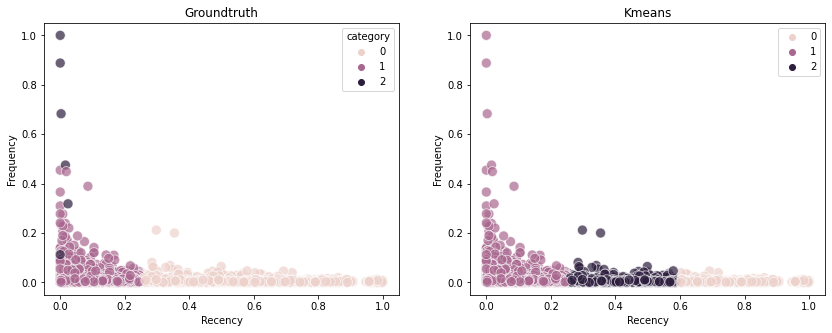

In [ ]:
fig, axs = plt.subplots(1,2, figsize =(14,5))
#Đồ thị gốc
ax = sns.scatterplot(data = rfm, 
                     x ='Recency', 
                     y ='Frequency', #Bằng tay
                     hue = rfm['category'], #true_label 
                     s=100,
                     alpha=0.7,
                     ax=axs[0])
ax.set_title('Groundtruth')

ax = sns.scatterplot(data = rfm,
                     x ='Recency',
                     y ='Frequency',
                     hue = y_pred, #pred_label
                     s=100, 
                     alpha=0.7,
                     ax=axs[1])
ax.set_title('Kmeans')
plt.show()

In [ ]:
customer_classify_predict = pd.DataFrame({'auto': kmeans.predict(rfm[['Recency','Frequency']]),
             'manual': rfm['category']})
customer_classify_predict

,auto,manual
Customer ID,,
12346,2,0
12347,1,1
12348,1,1
12349,1,1
12351,1,1
...,...,...
18283,1,1
18284,1,1
18285,0,0


## External validation: Biết sẵn nhãn có gì rồi 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(rfm['category'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60      1388
           1       1.00      1.00      1.00      2918
           2       0.00      0.00      0.00         6

    accuracy                           0.81      4312
   macro avg       0.67      0.47      0.53      4312
weighted avg       1.00      0.81      0.87      4312



- Độ chính xác cao nhưng độ nhạy thấp: Không dự báo được thực tế nhãn 2 => Mô hình không tốt

- Chỗ này f1-score thấp vì mình đang so sánh thử với category mình chia bằng tay ở mô hình RFM thì máy nó chia như nào.
- Đã dùng RFM thì khỏi dùng K-means làm gì.

## Internal validation

In [ ]:
kmeans.cluster_centers_ 

array([[0.77594402, 0.00429529],
       [0.087737  , 0.02130818],
       [0.40751335, 0.00817149]])

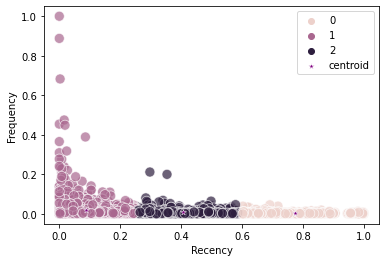

In [ ]:
ax = sns.scatterplot(data=rfm,
                    x='Recency',
                    y='Frequency',
                    hue = kmeans.labels_,
                    s=100, alpha=0.7)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Preprocessing using min max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler #min-max scaling cũng được coi là một kiểu normalization.
scaler = MinMaxScaler()

scaler.fit(rfm[['Recency','Frequency']])
rfm[['Recency','Frequency']] = scaler.transform(rfm[['Recency','Frequency']])

scaler.fit(rfm[['cluster']])
rfm['cluster'] = scaler.transform(rfm[['cluster']])

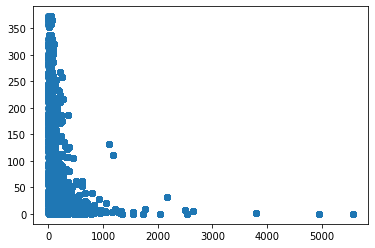

In [ ]:
plt.scatter(df.Frequency,df['Recency'])

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category,cluster
Customer ID,,,,,,,,,,
12346,0.439678,0.005748,372.86,3,1,1,311,5,0,1.0
12347,0.005362,0.012574,1323.32,4,1,1,411,6,1,0.5
12348,0.195710,0.003413,222.16,4,1,1,411,6,1,0.5
12349,0.112601,0.018143,2671.14,4,1,1,411,6,1,0.5
12351,0.026810,0.003593,300.93,4,1,1,411,6,1,0.5


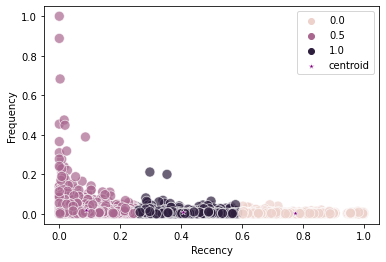

In [ ]:
ax = sns.scatterplot(data=rfm[['Recency','Frequency']],
                    x='Recency',
                    y='Frequency',
                    hue = rfm['cluster'],
                    s=100, alpha=0.7)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
km = KMeans(n_clusters=3)
y_pred= km.fit_predict(rfm[['Recency','Frequency']])
y_pred

array([0, 1, 1, ..., 2, 0, 1], dtype=int32)

In [ ]:
#rfm.drop('cluster', inplace=True, axis=1)

In [ ]:
rfm['cluster']=y_pred
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_category,RFM_score,category,cluster
Customer ID,,,,,,,,,,
12346,0.439678,0.005748,372.86,3,1,1,311,5,0,0
12347,0.005362,0.012574,1323.32,4,1,1,411,6,1,1
12348,0.195710,0.003413,222.16,4,1,1,411,6,1,1
12349,0.112601,0.018143,2671.14,4,1,1,411,6,1,1
12351,0.026810,0.003593,300.93,4,1,1,411,6,1,1


In [ ]:
km.cluster_centers_

array([[0.40751335, 0.00817149],
       [0.087737  , 0.02130818],
       [0.77594402, 0.00429529]])

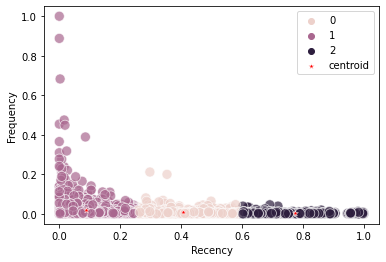

In [ ]:
ax = sns.scatterplot(data=rfm[['Recency','Frequency']],
                    x='Recency',
                    y='Frequency',
                    hue = rfm['cluster'],
                    s=100, alpha=0.7)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.legend()

# Elbow Plot: Khi chưa biết số nhóm cần chia

In [ ]:
#inertia
kmeans.inertia_ # sum of distance

36.31969225980713

In [ ]:
# For loop - k [1,10]
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append((i, km.inertia_))
sse

[(1, 296.21518000797164),
 (2, 66.74024835533216),
 (3, 36.31969225980713),
 (4, 22.342060180184404),
 (5, 16.024331143275138),
 (6, 12.587622445764108),
 (7, 10.04147533496877),
 (8, 8.154146948978324),
 (9, 6.768923716694906)]

In [ ]:
sse = np.array(sse)

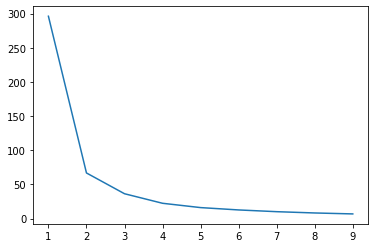

In [ ]:
plt.plot(sse[:,0], sse[:,1])
plt.show()

### Các điểm lưu ý khi dùng K-means
- Choose the optimal k
- Handle outlier before Kmeans
- Handle feature transformation before Kmeans: Bản chất của Kmeans dựa vào khoảng cách nên kết quả phân cụm sẽ bị ảnh hưởng => Cần chuẩn hóa dữ liệu trước khi đưa vào mô hình

- Để xác định số lượng cụm tối ưu, chúng ta phải chọn giá trị của k tại “khuỷu tay” tức là điểm mà sau đó biến dạng / quán tính bắt đầu giảm theo kiểu tuyến tính. Do đó đối với dữ liệu đã cho, chúng ta kết luận rằng số cụm tối ưu cho dữ liệu là 3.